# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
# Your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [2]:
# Your code here
df = pd.read_csv('data/ames.csv', index_col=0)

The following code checks that you loaded the data correctly:

In [3]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [4]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [5]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

In [6]:
df["SalePrice"].max()

755000

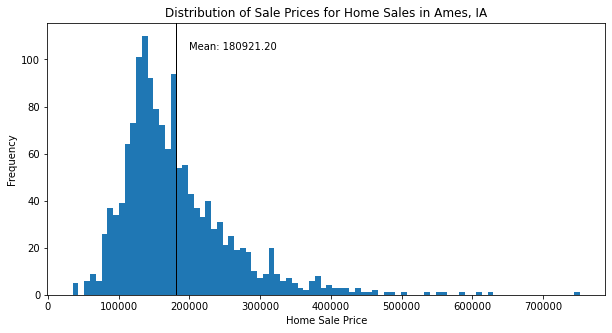

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
x = df.SalePrice 
bins = range(df["SalePrice"].min(), (df["SalePrice"].max() + 1), int(df["SalePrice"].median()) // 20)

ax.hist(x, bins=bins)

# Set x and y labels
ax.set_xlabel("Home Sale Price")
ax.set_ylabel("Frequency")

# Plot the average line
plt.axvline(x.mean(), color='k', linestyle='-', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))

ax.set_title("Distribution of Sale Prices for Home Sales in Ames, IA");

Now, print out the mean, median, and standard deviation:

In [8]:
print("The mean of SalePrice is: ", df['SalePrice'].mean())
print("The median of SalePrice is: ", df['SalePrice'].median())
print("The standard deviation of SalePrice is: ", df['SalePrice'].std())

The mean of SalePrice is:  180921.19589041095
The median of SalePrice is:  163000.0
The standard deviation of SalePrice is:  79442.50288288662


In the cell below, interpret the above information.

In [9]:
# Replace None with appropriate text
print("""
The median sale price is $163,000, while the mean is about $180,921, a difference of about $17,921.
This means that the distribution is slightly positively skewed, with more outliers being greater than the median price.
The standard deviation is $79,442, an indicator of wide variance of sale price about the mean.

""")


The median sale price is $163,000, while the mean is about $180,921, a difference of about $17,921.
This means that the distribution is slightly positively skewed, with more outliers being greater than the median price.
The standard deviation is $79,442, an indicator of wide variance of sale price about the mean.




### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

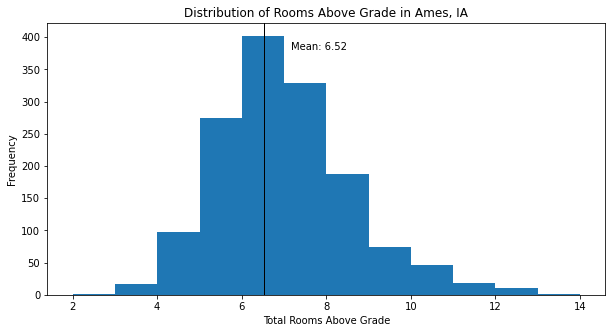

In [10]:
# Your code here
fig, ax = plt.subplots(figsize=(10, 5))
x = df.TotRmsAbvGrd 

bins = range(df["TotRmsAbvGrd"].min(), (df["TotRmsAbvGrd"].max() + 1))

ax.hist(x, bins=bins)

# Set x and y labels
ax.set_xlabel("Total Rooms Above Grade")
ax.set_ylabel("Frequency")

# Plot the average line
plt.axvline(x.mean(), color='k', linestyle='-', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))

ax.set_title("Distribution of Rooms Above Grade in Ames, IA");


Now, print out the mean, median, and standard deviation:

In [11]:
# Your code here
print("The mean of total rooms above ground is: ", df["TotRmsAbvGrd"].mean())
print("The median of total rooms above ground is: ", df["TotRmsAbvGrd"].median())
print("The standard deviation of total rooms above ground is: ", df["TotRmsAbvGrd"].std())

The mean of total rooms above ground is:  6.517808219178082
The median of total rooms above ground is:  6.0
The standard deviation of total rooms above ground is:  1.6253932905840505


In the cell below, interpret the above information.

In [12]:
# Replace None with appropriate text
print("""
The median of rooms above grade is 6.0, while the mean is about 6.5, a difference of only 0.5.
This means that the distribution is largely normally distributed with no significant outliers.
The standard deviation is 1.62, an indicator of narrow variance about the mean.

""")



The median of rooms above grade is 6.0, while the mean is about 6.5, a difference of only 0.5.
This means that the distribution is largely normally distributed with no significant outliers.
The standard deviation is 1.62, an indicator of narrow variance about the mean.




### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

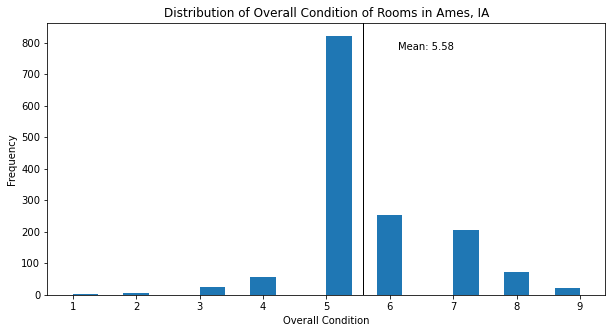

In [13]:
# Your code here
fig, ax = plt.subplots(figsize=(10, 5))
x = df.OverallCond 
bins = 20

ax.hist(x, bins=bins)

# Set x and y labels
ax.set_xlabel("Overall Condition")
ax.set_ylabel("Frequency")

# Plot the average line
plt.axvline(x.mean(), color='k', linestyle='-', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))

ax.set_title("Distribution of Overall Condition of Rooms in Ames, IA");

In [14]:
df["OverallCond"].max()

9

Now, print out the mean, median, and standard deviation:

In [15]:
# Your code here
print("The mean of overall condition is: ", df["OverallCond"].mean())
print("The median of overall condition is: ", df["OverallCond"].median())
print("The standard deviation of overall condition is: ", df["OverallCond"].std())

The mean of overall condition is:  5.575342465753424
The median of overall condition is:  5.0
The standard deviation of overall condition is:  1.1127993367127316


In the cell below, interpret the above information.

In [16]:
# Replace None with appropriate text
print("""
The median of overall condition is 5.0, while the mean is about 5.5, a difference of only 0.5.
This means that the distribution is largely normally distributed with minimal significant outliers.
The standard deviation is 1.11, an indicator that the overall condition of most houses is distributed about the mean.
""")


The median of overall condition is 5.0, while the mean is about 5.5, a difference of only 0.5.
This means that the distribution is largely normally distributed with minimal significant outliers.
The standard deviation is 1.11, an indicator that the overall condition of most houses is distributed about the mean.



## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [17]:
# Replace None with appropriate code
below_average_condition = df.loc[df["OverallCond"] < 5]
average_condition = df.loc[df["OverallCond"] == 5]
above_average_condition = df.loc[df["OverallCond"] > 5]

The following code checks that you created the subsets correctly:

In [18]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

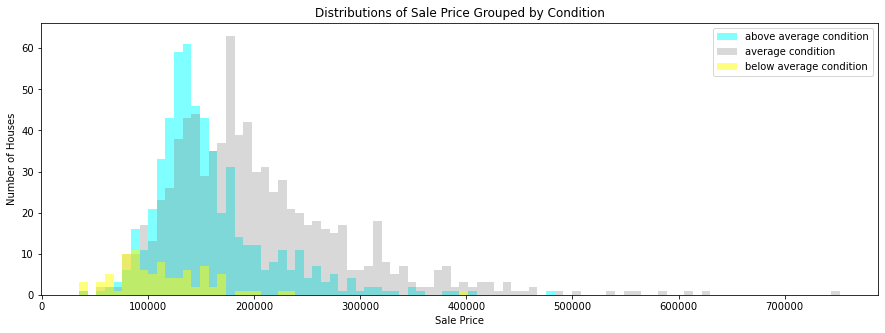

In [19]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

In [20]:
print("Mean price for above average condition:", above_average_condition["SalePrice"].mean())
print("Mean price for average condition:", average_condition["SalePrice"].mean())
print("Mean price for below average condition:", below_average_condition["SalePrice"].mean())

print("Median price for above average condition:", above_average_condition["SalePrice"].median())
print("Median price for average condition:", average_condition["SalePrice"].median())
print("Median price for below average condition:", below_average_condition["SalePrice"].median())

Mean price for above average condition: 158216.28130671507
Mean price for average condition: 203146.91473812424
Mean price for below average condition: 115729.06818181818
Median price for above average condition: 144500.0
Median price for average condition: 185000.0
Median price for below average condition: 108000.0


Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [23]:
# Replace None with appropriate text
print("""
The distribution of house sale prices appears to be largely normally distributed across the three overall condition categories.
However, the average condition category is distributed at the highest mean and median prices, the above average condition 
is distributed at the second highest mean and median prices, while the below average price is distributed at the lowest 
mean and median prices.

The houses in the below average condition band are also much fewer than those in the average and above average condition bands.

A suprising observation is that houses in the average condition band are distributed around higher mean and median prices than 
those in the above average condition band.

""")


The distribution of house sale prices appears to be largely normally distributed across the three overall condition categories.
However, the average condition category is distributed at the highest mean and median prices, the above average condition 
is distributed at the second highest mean and median prices, while the below average price is distributed at the lowest 
mean and median prices.

The houses in the below average condition band are also much fewer than those in the average and above average condition bands.

A suprising observation is that houses in the average condition band are distributed around higher mean and median prices than 
those in the above average condition band.




## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [59]:
# Your code here
df.corr().SalePrice.drop('SalePrice').nlargest(1)

OverallQual    0.790982
Name: SalePrice, dtype: float64

Now, find the ***most negatively correlated*** column:

In [60]:
df.corr().SalePrice.drop('SalePrice').nsmallest(1)

KitchenAbvGr   -0.135907
Name: SalePrice, dtype: float64

Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

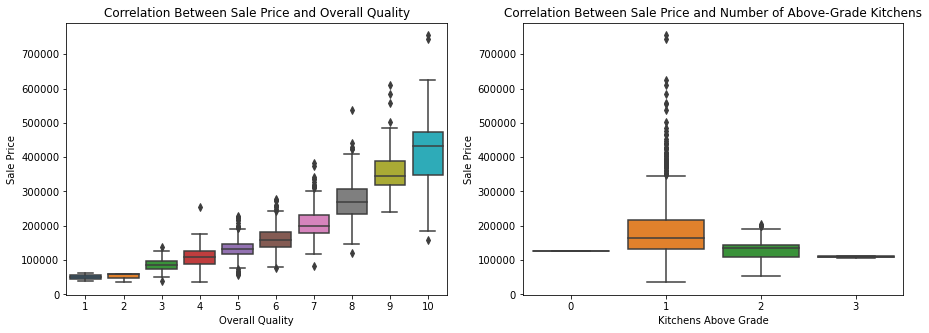

In [64]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df['OverallQual'],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df['KitchenAbvGr'],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("Correlation Between Sale Price and Overall Quality")
ax1.set_xlabel("Overall Quality")
ax1.set_ylabel("Sale Price")
ax2.set_title("Correlation Between Sale Price and Number of Above-Grade Kitchens")
ax2.set_xlabel("Kitchens Above Grade")
ax2.set_ylabel("Sale Price");

In [65]:
df['KitchenAbvGr'].unique()

array([1, 2, 3, 0], dtype=int64)

Interpret the results below. Consult `data/data_description.txt` as needed.

In [72]:
# Replace None with appropriate text
print("""
The sale price of the houses is highly positively correlated with the overall quality. The higher the price, the higher
the general quality. The box plots show that there are more higher-priced houses in the higher overall quality range.

The second boxplot shows that the sale price is negatively correlated with the number of kitchens. A few cheap houses have no 
above-grade kitchens, while majority of the expensive houses have one above-grade kitchen. 
This could mean that the buyers of the expensive houses have smaller families or that they are preferring houses with one 
kitchen so as to get it at a lower overall price.
""")


The sale price of the houses is highly positively correlated with the overall quality. The higher the price, the higher
the general quality. The box plots show that there are more higher-priced houses in the higher overall quality range.

The second boxplot shows that the sale price is negatively correlated with the number of kitchens. A few cheap houses have no 
above-grade kitchens, while majority of the expensive houses have one above-grade kitchen. 
This could mean that the buyers of the expensive houses have smaller families or that they are preferring houses with one 
kitchen so as to get it at a lower overall price.



## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [66]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

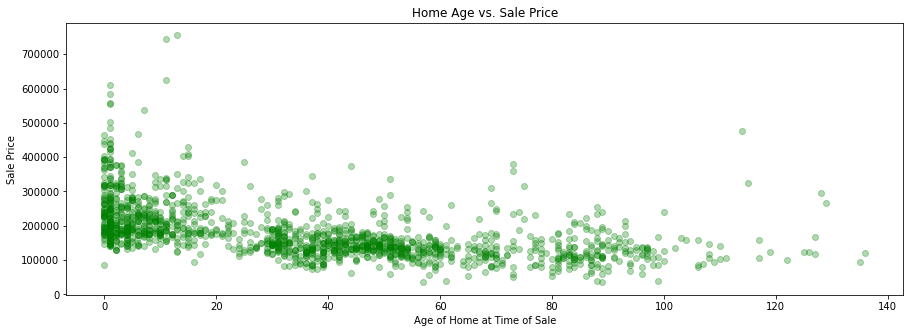

In [67]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

In [68]:
df["YearBuilt"].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905], dtype=int64)

Interpret this plot below:

In [70]:
# Replace None with appropriate text
print("""
There is a general negative correlation between the age of a home and the sale price. The newest houses tend to fetch a higher 
price in the market. The sales volume is also higher among the newest houses.

The density of the scatter points also shows that sales volume does not necessarily decrease with the age of a house.
It is highest among the newest houses (ages 0 to around 10), then it decreases drastically among houses that are between 
20 to around 30 of age before rising sharply among houses aged around 35 to 55.
This could mean that new houses are in demand because they're new and that those aged between 35 and 55 have been refurbished 
enough to look as good as new.
""")


There is a general negative correlation between the age of a home and the sale price. The newest houses tend to fetch a higher 
price in the market. The sales volume is also higher among the newest houses.

The density of the scatter points also shows that sales volume does not necessarily decrease with the age of a house.
It is highest among the newest houses (ages 0 to around 10), then it decreases drastically among houses that are between 
20 to around 30 of age before rising sharply among houses aged around 35 to 55.
This could mean that new houses are in demand because they're new and that those aged between 35 and 55 have been refurbished 
enough to look as good as new.



## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.